In [27]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [28]:
ph=1.5574E-4
times=[1,2,3,6,7,9,13,16,21,24,31] 
# protien="FAS_MOUSE" 
protien="CPSM_MOUSE"

pxt=[(x) for x in list(range(3,50,1))]
neh=range(1,120)

In [29]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]


In [30]:
time=2
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[4]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]
data1.pxt=[round(x*1000) for x in data1.pxt] 

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[2]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data2[["NEH","pxt","RMSE"]]
data2.pxt= [round(x*1000) for x in data2.pxt]

data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data3["T_NEH"][0],data3["NH"][0])
data3=data3[["NEH","pxt","RMSE"]]
data3.pxt= [round(x*1000) for x in data3.pxt]

# data4=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[4]}_{time}_{protien}.csv")
# print(data4["T_NEH"][0],data4["NH"][0])
# data4=data4[["NEH","pxt","RMSE"]]
# data4.pxt= [round(x*1000) for x in data4.pxt]

27 97
25 93
34 106


In [31]:

import pandas as pd
import numpy as np

pxt=range(3,50)
neh=range(1,100)

data_px=pd.DataFrame(pxt)
data_neh=pd.DataFrame(neh)

data=pd.merge(data_px,data_neh,how='cross')
data=pd.merge(data,data_neh,how='cross',suffixes=["_1","_2"])
data=pd.merge(data,data_neh,how='cross',suffixes=["_1x","_2x"])
data.columns=["pxt","neh1","neh2","neh3"]
data["RMSE1"]=0
data["RMSE2"]=0
data["RMSE3"]=0

data.head()

pxt  neh1  neh2  neh3  RMSE1  RMSE2  RMSE3
0    3     1     1     1      0      0      0
1    3     1     1     2      0      0      0
2    3     1     1     3      0      0      0
3    3     1     1     4      0      0      0
4    3     1     1     5      0      0      0

In [32]:
for px in pxt:
    temp_px_data=data[(data.pxt==px)]
    temp_px_data1=data1[(data1.pxt==px)]
    temp_px_data2=data2[(data2.pxt==px)]
    temp_px_data3=data3[(data3.pxt==px)]
    for n in neh:
        temp_index=temp_px_data[(temp_px_data.neh1==n)].index
        data.loc[temp_index,"RMSE1"]=float(temp_px_data1[(temp_px_data1.NEH==n)].RMSE)
        
        temp_index=temp_px_data[(temp_px_data.neh2==n)].index
        data.loc[temp_index,"RMSE2"]=float(temp_px_data2[(temp_px_data2.NEH==n)].RMSE)
        
        temp_index=temp_px_data[(temp_px_data.neh3==n)].index
        data.loc[temp_index,"RMSE3"]=float(temp_px_data3[(temp_px_data3.NEH==n)].RMSE)
        
        
#         print(px,n)

In [33]:
# data[(data.pxt==3)&(data.neh1==1)]
data["RMSE"]=data.RMSE1+data.RMSE2+data.RMSE3
data.sort_values(by="RMSE")

pxt  neh1  neh2  neh3     RMSE1     RMSE2     RMSE3      RMSE
365065      3    38    25    53  0.011955  0.008660  0.004527  0.025142
365164      3    38    26    53  0.011955  0.008660  0.004527  0.025142
355264      3    37    25    53  0.011959  0.008660  0.004527  0.025146
355363      3    37    26    53  0.011959  0.008660  0.004527  0.025147
374866      3    39    25    53  0.011975  0.008660  0.004527  0.025162
...       ...   ...   ...   ...       ...       ...       ...       ...
45356528   49    74    74    75  0.223455  0.221115  0.217754  0.662325
45366427   49    75    75    74  0.223935  0.221578  0.217251  0.662764
45356627   49    74    75    75  0.223455  0.221578  0.217754  0.662788
45366329   49    75    74    75  0.223935  0.221115  0.217754  0.662804
45366428   49    75    75    75  0.223935  0.221578  0.217754  0.663267

[45604053 rows x 8 columns]

<AxesSubplot:xlabel='RMSE', ylabel='Density'>

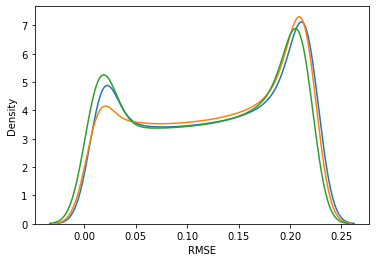

In [34]:
import seaborn as sns
sns.kdeplot(data1.RMSE) 
sns.kdeplot(data2.RMSE)
sns.kdeplot(data3.RMSE)


<AxesSubplot:ylabel='Density'>

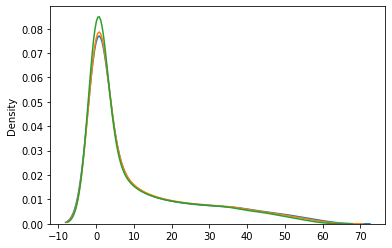

In [35]:

# sns.kdeplot(data1.NEH)  #data1.pxt
# sns.kdeplot(data2.NEH)  #data2.pxt
# sns.kdeplot(data3.NEH)  #data3.pxt

sns.kdeplot(data1.NEH*data1.pxt*data1.RMSE**3) 
sns.kdeplot(data2.NEH*data2.pxt*data2.RMSE**3)
sns.kdeplot(data3.NEH*data3.pxt*data3.RMSE**3)

C:\Users\hmdebern.UTMB-USERS-M\AppData\Local\Temp\ipykernel_32376\3858479389.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


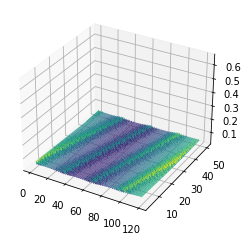

In [36]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data1.NEH, data1.pxt, data.RMSE, cmap=plt.cm.viridis, linewidth=0.2,)
ax.figsize=(10,10)
plt.show()

C:\Users\hmdebern.UTMB-USERS-M\AppData\Local\Temp\ipykernel_32376\1958503758.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


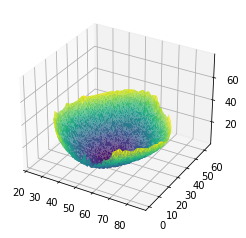

In [41]:
temp=data[data.pxt==3]
temp=temp[temp.RMSE <= 1.5*min(temp.RMSE)]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(temp.neh3, temp.neh2, temp.neh1, cmap=plt.cm.viridis, linewidth=0.2,)
ax.figsize=(10,10)
plt.show()

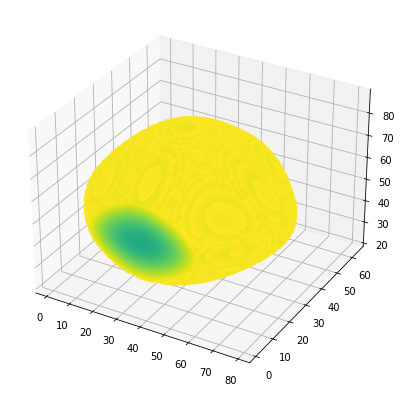

In [42]:
fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(temp.neh1, temp.neh2, temp.neh3,c=(temp.RMSE1+temp.RMSE2+temp.RMSE3))
# ax.view_init(-120,120) 
ax.figure.set_size_inches(7,7)

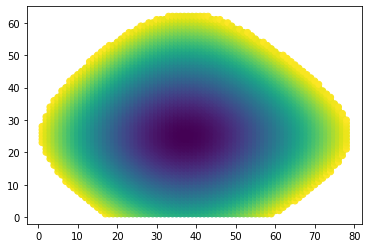

In [49]:
n=50
plt.scatter(temp[temp.neh3==n].neh1,temp[temp.neh3==n].neh2,c=temp[temp.neh3==n].RMSE)

In [40]:
(temp[temp.neh3==3].RMSE3-temp[temp.neh3==4].RMSE3)

2        NaN
3        NaN
101      NaN
102      NaN
200      NaN
          ..
965055   NaN
965153   NaN
965154   NaN
965253   NaN
965352   NaN
Name: RMSE3, Length: 15860, dtype: float64

In [26]:
# # libraries
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
 
# # Get the data (csv file is hosted on the web)
# url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
# data = pd.read_csv(url)
 
# # Transform it to a long format
# df=data.unstack().reset_index()
# df.columns=["X","Y","Z"]
 
# # And transform the old column name in something numeric
# df['X']=pd.Categorical(df['X'])
# df['X']=df['X'].cat.codes
 
# # Make the plot
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# plt.show()
 
# # to Add a color bar which maps values to colors.
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()
 
# # Rotate it
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# ax.view_init(30, 45)
# plt.show()
 
# # Other palette
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
# plt.show()

In [73]:
df

X   Y    Z
0      0   0  100
1      0   1  101
2      0   2  102
3      0   3  103
4      0   4  104
...   ..  ..  ...
5302  57  82   94
5303  57  83   94
5304  57  84   94
5305  57  85   94
5306  57  86   94

[5307 rows x 3 columns]

In [ ]:
# data[(data.pxt==3)&(data.neh1==1)] t= 3
data["RMSE"]=data.RMSE1+data.RMSE2+data.RMSE3
data.sort_values(by="RMSE")

In [ ]:
# data[(data.pxt==3)&(data.neh1==1)] t= 6 ******
data["RMSE"]=data.RMSE1+data.RMSE2+data.RMSE3
data.sort_values(by="RMSE")

In [ ]:
# data[(data.pxt==3)&(data.neh1==1)] ====> t=31
data["RMSE"]=data.RMSE1+data.RMSE2+data.RMSE3
data.sort_values(by="RMSE")

In [ ]:
time=24
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[5]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]
data1.pxt=[round(x*1000) for x in data1.pxt] #(10000*data1.pxt).astype("int")

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[6]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data2[["NEH","pxt","RMSE"]]
data2.pxt= [round(x*1000) for x in data2.pxt] #(10000*data2.pxt).astype("int")

# ========================================================================

pxt=range(3,50)
neh=range(1,100)

data_px=pd.DataFrame(pxt)
data_neh=pd.DataFrame(neh)

data=pd.merge(data_px,data_neh,how='cross')
data=pd.merge(data,data_neh,how='cross',suffixes=["_1","_2"])
data.columns=["pxt","neh1","neh2"]
data["RMSE1"]=0
data["RMSE2"]=0 

for px in pxt:
    for n in neh:
        temp_index=data[(data.pxt==px)&(data.neh1==n)].index
        data.loc[temp_index,"RMSE1"]=float(data1[(data1.pxt==px)&(data1.NEH==n)].RMSE)
        
        
        temp_index=data[(data.pxt==px)&(data.neh2==n)].index
        data.loc[temp_index,"RMSE2"]=float(data2[(data2.pxt==px)&(data2.NEH==n)].RMSE)
data.pxt=data.pxt/1000                 
data["RMSE"]=data.RMSE1+data.RMSE2
data.sort_values(by="RMSE").head(10)

In [ ]:
time=31
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[6]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

# data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[2]}_{31}_{protien}.csv")
# data3=data1[["NEH","pxt","RMSE"]]
# data3.head()


temp=pd.merge(data1,data2,how="cross")
temp=temp[temp.pxt_x==temp.pxt_y]
temp["RMSE"]=temp.RMSE_x+ temp.RMSE_y
temp=temp[["pxt_x","NEH_x","NEH_y","RMSE"]]
temp=temp.sort_values(by="RMSE")
temp.tail(123)

In [ ]:
# temp=pd.merge(temp,data3,how="cross")
# # temp=temp[temp.pxt_x==temp.pxt_y]
# # temp["RMSE"]=temp.RMSE_x+ temp.RMSE_y
# # temp=temp[["pxt_x","NEH_x","NEH_y","RMSE"]]
# temp

In [ ]:
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[6]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt"]]

temp=pd.merge(data1,data2,how="cross")
temp=temp[temp.pxt_x==temp.pxt_y]
temp=temp[["pxt_x","NEH_x","NEH_y"]]
temp


In [ ]:
time=31
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[0]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[1]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[2]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

In [ ]:
pxt=[(x/1000) for x in list(range(3,50,1))]
neh=range(1,120)

In [ ]:
res=[]
for px in pxt:
    
    for n1 in neh:
        rmse1= float(data1[(data1.pxt==px)&(data1.NEH==n1)].RMSE)
        
        for n2 in neh:                
            rmse2= float(data2[(data2.pxt==px)&(data2.NEH==n2)].RMSE)
            res.append([px,n1,n2,(rmse1+rmse2)])
            
#             for n3 in neh:                
#                 rmse3= float(data1[(data1.pxt==px)&(data1.NEH==n3)].RMSE)
#                 res.append([px,n1,n2,n3,(rmse1+rmse2+rmse3)])

In [ ]:
np.array(res).shape

In [ ]:
float(data1[(data1.pxt==0.01)&(data1.NEH==1)].RMSE)

In [ ]:
data1[data1.pxt==0.006].RMSE

In [ ]:
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[0]}_{time}_{protien}.csv")
# data1[data1.pxt==0.006].RMSE
data1.query("pxt>0.06")

In [ ]:
data1.pxt

In [ ]:
vals=[]
temp_kk=[]
temp_neh=[]
# protien="FAS_MOUSE"
# protien="CPSM_MOUSE"
# protien="CPT2_MOUSE"
# protien="CSAD_MOUSE"
protien="DHE3_MOUSE"
for pep in pept:
    neh_coll=[]
    pxt_neh=[]
    for time in times:
        try:
            print(f"\n {pep} Time",time,"==================================>")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AcVDTALENLSTLK_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DAMLENQTPELFQDVNKPK_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DcMLGMEFSGR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DTSFEQHVLLHTGGK_3_{time}_FAS_MOUSE.csv") 
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_EGGFLLVHTVLK_2_{time}_FAS_MOUSE.csv") 
            data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_{protien}.csv")

            data["const"]=data.NEH*data.pxt
            data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
            data["new_neh"]=data.const/data.new_pxt
            data=data.sort_values(by=["RMSE"],ascending=True)
            data=data[data.NEH<=data.NH]

            plt.scatter(data.const,data.RMSE,s=1,c='k')
#             plt.hlines(y=2.5*min(data.RMSE),xmin=min(data.const),xmax=max(data.const),color='r')
            plt.show()
            
            print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
            print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))
            
            pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
#             if(not islinear(data[["const","RMSE"]])):
            tempdata=data[data.RMSE<2.5*min(data.RMSE)]
            tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
            tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
            tempdata=tempdata.sort_values(by=["pxt_dif"])
#             print(data.T_NEH[0],np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            
        except:
            print("Error",time)

#     print(neh_coll)
    print("\n",pxt_neh)
    temp_kk.append(pxt_neh)
    temp_neh.append(data.T_NEH[0])
    
#     plt.hist(neh_coll,color='k',bins=50)
#     print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",np.median(neh_coll))
    eneh=estimateneh(pxt_neh)
    print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",eneh)
#     vals.append([pep,data.T_NEH[0],np.median(neh_coll)])
    vals.append([pep,data.T_NEH[0],eneh])
    print("===============================================================\n")
    print("===============================================================\n")
    print("===============================================================\n")

In [ ]:
res=pd.DataFrame(vals,columns=["Peptieds","True NEH","Estimated NEH"])
res["diff"]=abs(res["True NEH"]-res["Estimated NEH"])
res=res.dropna()
res.sort_values(by="diff").head(50)

In [ ]:
print( float(res[["diff"]].mean()),float(res[["diff"]].median()),float(res[["diff"]].std()))

In [ ]:
temp_kk


In [ ]:
temp_neh

In [52]:
pts[[3, 14]]

array([0.959, 0.894])

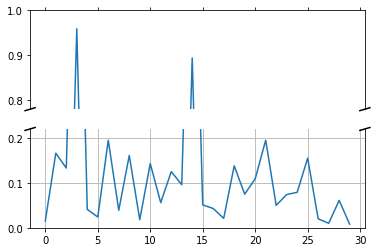

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
plt.grid
ax.plot(pts)
ax2.plot(pts)
plt.grid
# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
plt.grid
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.grid()
plt.show()

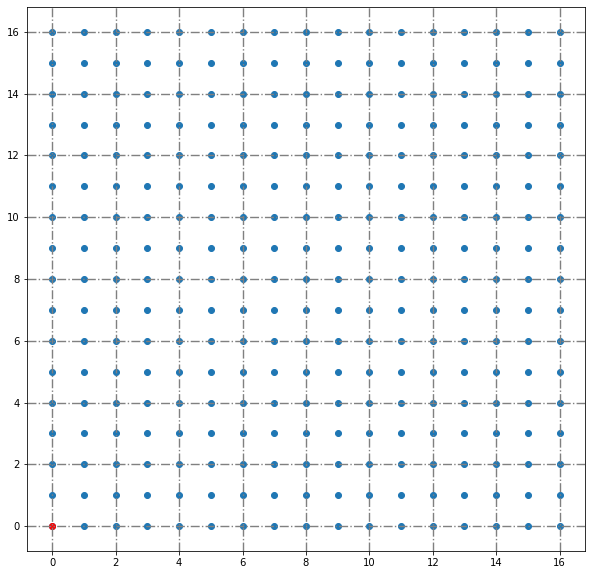

In [19]:
plt.figure(figsize=(10,10))
x,y=np.meshgrid(range(17),range(17))
ax=plt.scatter(x,y)
plt.scatter([0],[0],c='r')
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")


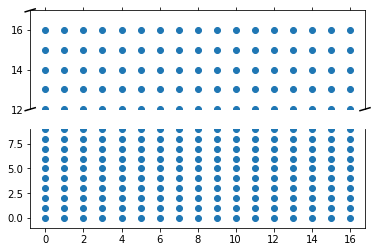

In [8]:
import matplotlib.pyplot as plt
import numpy as np


# # 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
# pts = np.array([
#     0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
#     0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
#     0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# # Now let's make two outlier points which are far away from everything.
# pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
 
# ax.plot(pts)
ax.scatter(x,y)
# ax2.plot(pts)
ax2.scatter(x,y)
 
# # zoom-in / limit the view to different portions of the data
ax.set_ylim(12, 17)  # outliers only
ax2.set_ylim(-1, 9)  # most of the data
# ax2.set_xlim(-1,8)

# # hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
 
# # This looks pretty good, and was fairly painless, but you can get that
# # cut-out diagonal lines look with just a bit more work. The important
# # thing to know here is that in axes coordinates, which are always
# # between 0-1, spine endpoints are at these locations (0,0), (0,1),
# # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# # appropriate corners of each of our axes, and so long as we use the
# # right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# # kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# # What's cool about this is that now if we vary the distance between
# # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# # the diagonal lines will move accordingly, and stay right at the tips
# # of the spines they are 'breaking'
# plt.grid()
plt.show()

In [97]:


# x = np.linspace(0,10,100)
# x[75:] = np.linspace(40,42.5,25)

# y = np.sin(x)

# f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# # plot the same data on both axes
# ax.plot(x, y)
# ax2.plot(x, y)

# ax.set_xlim(0,7.5)
# ax2.set_xlim(40,42.5)

# # hide the spines between ax and ax2
# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
# ax2.yaxis.tick_right()

# # This looks pretty good, and was fairly painless, but you can get that
# # cut-out diagonal lines look with just a bit more work. The important
# # thing to know here is that in axes coordinates, which are always
# # between 0-1, spine endpoints are at these locations (0,0), (0,1),
# # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# # appropriate corners of each of our axes, and so long as we use the
# # right transform and disable clipping.

# d = .015 # how big to make the diagonal lines in axes coordinates
# # arguments to pass plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1-d,1+d), (-d,+d), **kwargs)
# ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# ax2.plot((-d,+d), (-d,+d), **kwargs)

# # What's cool about this is that now if we vary the distance between
# # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# # the diagonal lines will move accordingly, and stay right at the tips
# # of the spines they are 'breaking'

# plt.show()

In [11]:
# !pip install brokenaxes

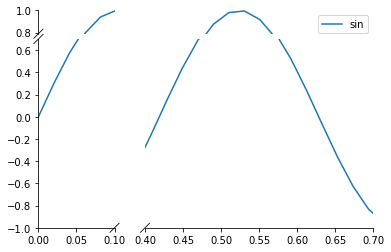

In [15]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

fig = plt.figure(figsize=(6,4))
baxes = brokenaxes(xlims=((0,0.1),(0.4,0.7)), ylims=((-1,.7),(0.79,1)), hspace=.05)
x = np.linspace(0,1,50)
baxes.plot(x,np.sin(15*x),label="sin")
baxes.plot(x,np.cos(15*x),label="cos")
baxes.legend(loc="best")
plt.show()

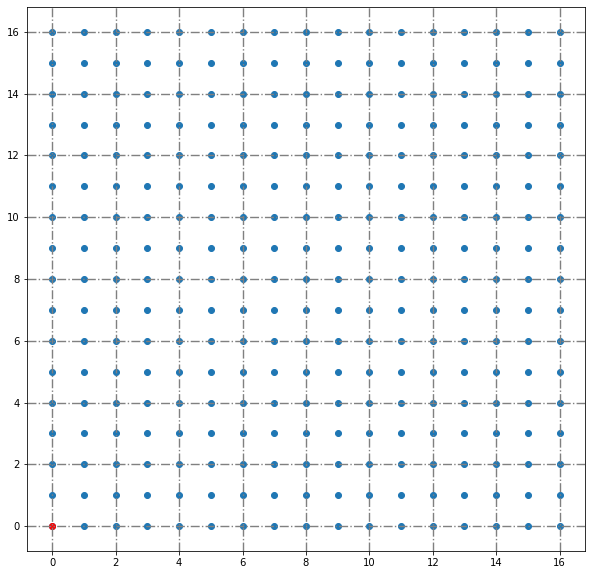

In [29]:
plt.figure(figsize=(10,10))
x,y=np.meshgrid(range(17),range(17))
ax=plt.scatter(x,y)
plt.scatter([0],[0],c='r')
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")

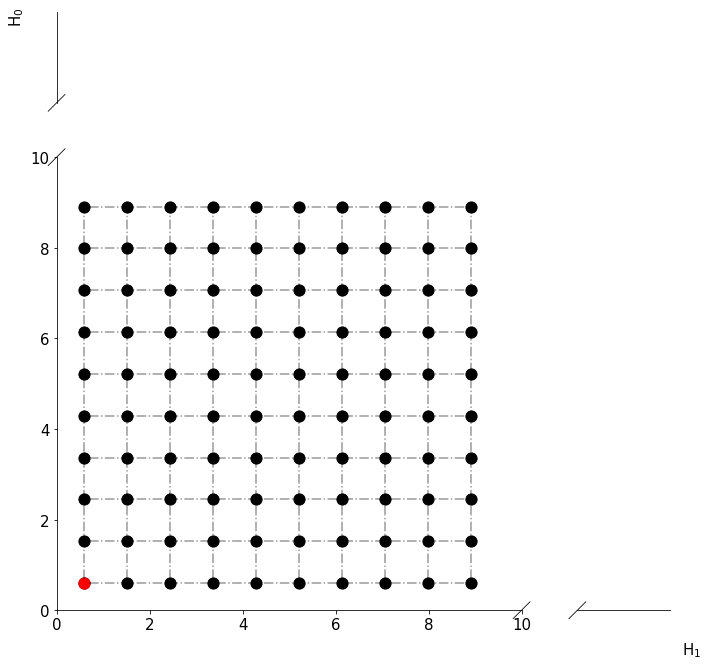

In [183]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np


plt.rcParams["font.size"] = "15"
x,y=np.meshgrid(range(14),range(14))
x1,y1=np.meshgrid(range(10),range(10))

fig = plt.figure(figsize=(11,11))
baxes = brokenaxes(xlims=((0,10),(12,14)), ylims=((0,10),(12,14)))
# x = np.linspace(0,1,50)
# baxes.plot(x,np.sin(15*x),label="sin")
# baxes.plot(x,np.cos(15*x),label="cos")
size=125
plt.scatter(x,y,c='w',s=size)
plt.scatter(x1,y1,c='k',s=size)
plt.scatter([0],[0],c='r',s=size)

ax = plt.gca()
# baxes.grid(True, color = "grey", linewidth = "1.4", linestyle = "-")
for i in range(10):
    plt.hlines(y=i,xmin=0.1,xmax=9,linestyle = "-.",color='k',alpha=0.4)
    plt.vlines(x=i,ymin=0.1,ymax=9,linestyle = "-.",color='k',alpha=0.4)

plt.xlabel(f"H$_1$",loc='right')
plt.ylabel(f"H$_0$",loc='top')

# for ax in baxes.axs:
#     ax.set_xticks([0,2,4,6])
#     ax.set_yticks([0,2,4,6]) 
#     break
    
baxes.axs[0].set_xticks([]) 
baxes.axs[1].set_xticks([])  
baxes.axs[3].set_xticks([])

baxes.axs[0].set_yticks([]) 
baxes.axs[1].set_yticks([])  
baxes.axs[3].set_yticks([])


baxes.axs[0].set_xticks([4]) 
 

# ax.set_xticks([0,2,4,6])
# ax.set_xticklabels(['zero','two','four','six'])

ax.xaxis.set_label_coords(1.05, -0.05)
ax.yaxis.set_label_coords(-0.05,1.01)

 
plt.show() 

In [148]:
baxes.axs

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

In [ ]:
ax=plt.scatter(x,y)
plt.scatter([0],[0],c='r')

In [25]:
x.shape

(50,)

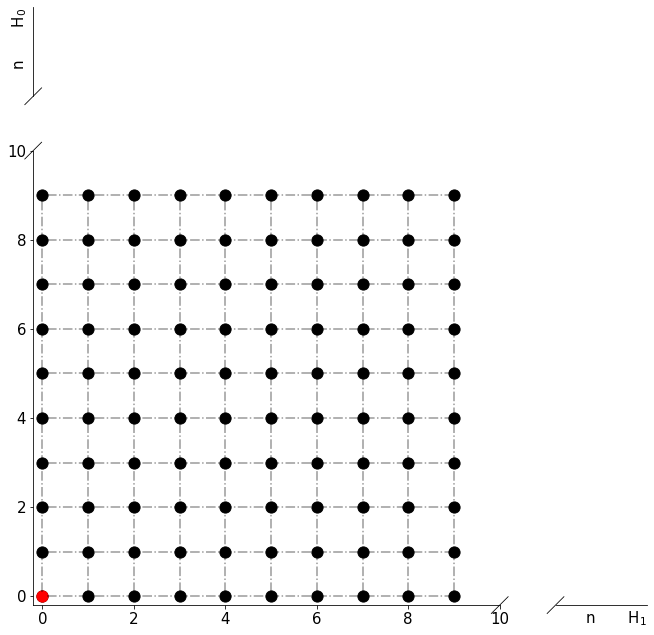

In [197]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np


plt.rcParams["font.size"] = "15"
x,y=np.meshgrid(range(14),range(14))
x1,y1=np.meshgrid(range(10),range(10))

fig = plt.figure(figsize=(11,11))
baxes = brokenaxes(xlims=((-0.2,10),(12,14)), ylims=((-0.2,10),(12,14)))
# x = np.linspace(0,1,50)
# baxes.plot(x,np.sin(15*x),label="sin")
# baxes.plot(x,np.cos(15*x),label="cos")
size=125
baxes.scatter(x,y,c='w',s=size)
baxes.scatter(x1,y1,c='k',s=size)
baxes.scatter([0],[0],c='r',s=size)

# ax = plt.gca()
# # baxes.grid(True, color = "grey", linewidth = "1.4", linestyle = "-")
for i in range(10):
    baxes.hlines(y=i,xmin=0.1,xmax=9,linestyle = "-.",color='k',alpha=0.4)
    baxes.vlines(x=i,ymin=0.1,ymax=9,linestyle = "-.",color='k',alpha=0.4)

plt.xlabel(f"n \tH$_1$",loc='right')
plt.ylabel(f"n \tH$_0$",loc='top')

# for ax in baxes.axs:
#     ax.set_xticks([0,2,4,6])
#     ax.set_yticks([0,2,4,6]) 
#     break
    
baxes.axs[0].set_xticks([]) 
baxes.axs[1].set_xticks([])  
baxes.axs[3].set_xticks([])

baxes.axs[0].set_yticks([]) 
baxes.axs[1].set_yticks([])  
baxes.axs[3].set_yticks([])


# baxes.axs[0].set_xticks([4]) 
 

# # ax.set_xticks([0,2,4,6])
# # ax.set_xticklabels(['zero','two','four','six'])

# ax.xaxis.set_label_coords(1.05, -0.05)
# ax.yaxis.set_label_coords(-0.05,1.01)

plt.savefig('grid_plot.jpeg',dpi=900, bbox_inches = "tight")
 
plt.show() 

In [ ]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_24_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

In [ ]:

ph

In [ ]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [ ]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)

data["test"]= 1-ph-data.pxt == (data.NEH*data.pxt)/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) )

data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]



# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(20)

In [ ]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

from sklearn.decomposition import PCA

pca = PCA() # Compute PCA
pca.fit_transform(  data[["const","RMSE"]])
eigenvalues = pca.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 8) # Round off eigenvalues
eigenvalues

In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(15,6))
plt.scatter(data.const,data.RMSE,s=1)
print(data[data.new_pxt<0].shape)

In [ ]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
tempdata.sort_values(by=["pxt_dif"]).head(25)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(tempdata.const,tempdata.RMSE,s=1)

In [ ]:
np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [ ]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])

In [ ]:
np.array([0.2475, 0.47250000000000003, 0.345, 1.3425, 0.9825, 1.2075, 1.0725, 1.1925000000000001, 1.1775, 1.1175, 1.335])/75

In [ ]:
np.array([[0.16119999999999998, 0.3952, 0.41340000000000005, 0.9229999999999999, 0.9776, 0.9672, 1.0842, 1.183, 1.0608, 1.1258, 1.0972]])/26